In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
num_classes = 10
epochs = 15
learning_rate = 0.001
batch_size = 128
display_step = 100

output_channel_1 = 32
output_channed_2 = 64

checkpoint = 'Dang_raw.pth'

In [12]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, ), (0.5, ))
])

train_dataset = datasets.MNIST('../data', train = True, download = True, transform = transform)
test_dataset = datasets.MNIST('../data', train = False, transform = transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size)

In [29]:
model = nn.Sequential (
    nn.Conv2d(1, output_channel_1, 3, 1),
    nn.ReLU(),
    nn.Conv2d(output_channel_1, output_channel_1, 3, 1),
    nn.ReLU(),
    nn.MaxPool2d(2),
    nn.Dropout(0.3),
    nn.Flatten(),
    nn.Linear(4608, 64),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(64, num_classes)
)

In [30]:
try:
    model.load_state_dict(torch.load(checkpoint))
except:
    print("!!! Hãy train để có checkpoint file")

!!! Hãy train để có checkpoint file


In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)
best_val_loss = 999

for epoch in range(1,epochs):

    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output,target)
        loss.backward()
        optimizer.step()

        if batch_idx % display_step == 0:
            print('Train epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}'.format(epoch,  batch_idx * len(data),
                                                                                 len(train_loader.dataset),
                                                                                 100. * batch_idx / len(train_loader),
                                                                                 loss.item()))
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            output = F.log_softmax(output, dim = 1)
            test_loss += criterion(output, target)
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()
        test_loss /= len(test_loader.dataset)

        if test_loss < best_val_loss:
            best_val_loss = test_loss
            torch.save(model.state_dict(), checkpoint)
            print("***********    TEST_ACC = {}%    ***********".format(correct))

Train epoch: 1 [0/60000 (0%)]	Train Loss: 2.300873
Train epoch: 1 [12800/60000 (21%)]	Train Loss: 0.284914
Train epoch: 1 [25600/60000 (43%)]	Train Loss: 0.271364
Train epoch: 1 [38400/60000 (64%)]	Train Loss: 0.096575
Train epoch: 1 [51200/60000 (85%)]	Train Loss: 0.166881
***********    TEST_ACC = 9768%    ***********
Train epoch: 2 [0/60000 (0%)]	Train Loss: 0.165966
Train epoch: 2 [12800/60000 (21%)]	Train Loss: 0.085835
Train epoch: 2 [25600/60000 (43%)]	Train Loss: 0.095961
Train epoch: 2 [38400/60000 (64%)]	Train Loss: 0.136791
Train epoch: 2 [51200/60000 (85%)]	Train Loss: 0.134312
***********    TEST_ACC = 9820%    ***********
Train epoch: 3 [0/60000 (0%)]	Train Loss: 0.090847
Train epoch: 3 [12800/60000 (21%)]	Train Loss: 0.073222
Train epoch: 3 [25600/60000 (43%)]	Train Loss: 0.086676
Train epoch: 3 [38400/60000 (64%)]	Train Loss: 0.119646
Train epoch: 3 [51200/60000 (85%)]	Train Loss: 0.089933
***********    TEST_ACC = 9856%    ***********
Train epoch: 4 [0/60000 (0%)]	Trai

In [32]:
model.load_state_dict(torch.load(checkpoint))
model.eval()

Sequential(
  (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Dropout(p=0.3, inplace=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=4608, out_features=64, bias=True)
  (8): ReLU()
  (9): Dropout(p=0.4, inplace=False)
  (10): Linear(in_features=64, out_features=10, bias=True)
)

In [33]:
item = iter(test_loader)
data, target = next(item)
test_idx = random.choice(range(len(data)))

In [34]:
data = data[test_idx]
target = target[test_idx]
assert data.shape == (1, 28, 28)

In [37]:
def plot(data, model):
    data = torch.unsqueeze(data, dim = 0)
    output = model(data)
    output = F.log_softmax(output, dim = 1)
    pred = output.argmax(dim = 1, keepdim = True)
    print('Predict number : ', pred[0][0].detach().cpu().numpy())
    plt.imshow(data[0][0].detach().cpu().numpy(), cmap = 'gray')
    plt.show()

Predict number :  0


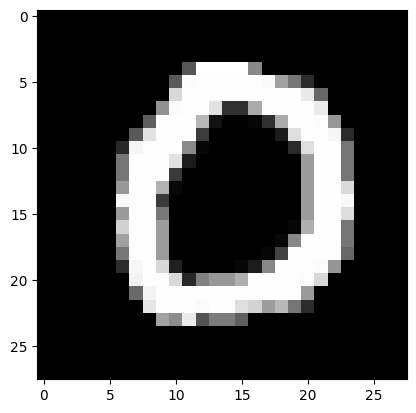

In [38]:
plot(data, model)